In [55]:
import numpy as np
import pandas as pd

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
gender_submission=pd.read_csv('gender_submission.csv')

In [56]:
data=pd.concat([train,test])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
print(len(train),len(test),len(data))

891 418 1309


In [58]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

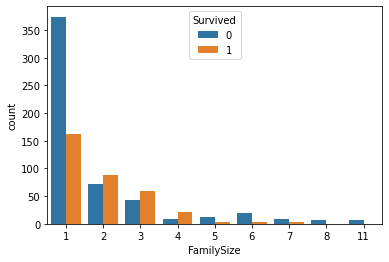

In [61]:
data['FamilySize']=data['Parch']+data['SibSp']+1
train['FamilySize']=data.FamilySize[:len(train)]
test['FamilySize']=data.FamilySize[len(train):]
import seaborn as sns
sns.countplot(x='FamilySize',data=train,hue='Survived');

In [62]:
data['IsAlone']=0
data.loc[data['FamilySize']==1,'IsAlone']=1
train['IsAlone']=data['IsAlone'][:len(train)]
test['IsAlone']=data['IsAlone'][len(train):]

In [47]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].fillna('S',inplace=True)
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [48]:
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)
# age_avg = data['Age'].mean()
# age_std = data['Age'].std()
data['Age'].fillna(data['Age'].median(), inplace=True)
delete_columns = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)
train = data[:len(train)]
test = data[len(train):]
y_train = train['Survived']
X_train = train.drop('Survived', axis = 1)
X_test = test.drop('Survived', axis = 1)

In [49]:

X_train.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,3,0,35.0,8.0500,0


In [50]:
y_train.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [51]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty='l2',solver='sag',random_state=0)
clf.fit(X_train,y_train)

/Users/takeuchihiroki/.pyenv/versions/anaconda3-5.2.0/envs/Analysis/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(random_state=0, solver='sag')

In [53]:
y_pred=clf.predict(X_test)

In [54]:
y_pred[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0.])